### Problem 1.

### A)
For the 1 day average of cosmic rays we detect, I chose the value $X = 3$, and for the average number of gamma rays, $Y = 5$.
We create a Poisson distributions with those values for mu to get the the probabilities we would expect for seeing different numbers of events for a single day. Then we convolve that distribution with itself for each additional day of observations and plot them to see how they change.

In [12]:
from scipy.stats import poisson, norm, rayleigh
import numpy as np
import matplotlib.pyplot as plt

mu_x = 3
mu_y = 5

x = np.arange(0,
              10)
y = np.arange(poisson.ppf(0.01, mu_y),
              poisson.ppf(0.99, mu_y))


x_dist = poisson.pmf(x, mu_x)

x_dists = [x_dist]
for i in range(6):
    res = np.convolve(x_dists[i], x_dists[0])
    x_dists.append(res)

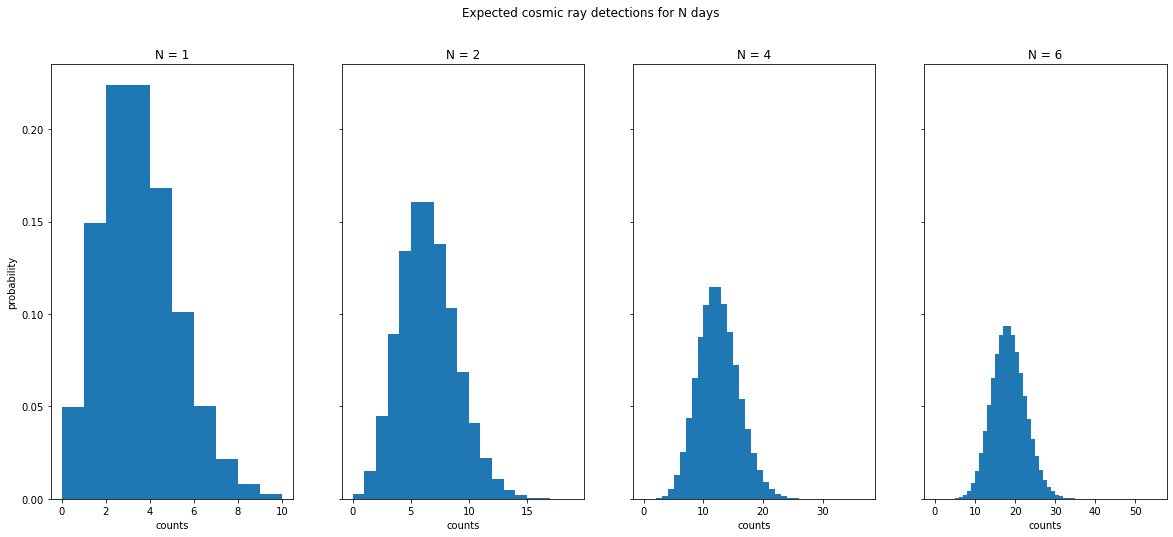

In [2]:
fig, ax = plt.subplots(1,4,figsize=(20,8), sharey=True)
ax[0].stairs(x_dists[0], fill=True)
ax[0].set_title('N = 1')

ax[1].stairs(x_dists[1], fill=True)
ax[1].set_title('N = 2')

ax[2].stairs(x_dists[3], fill=True)
ax[2].set_title('N = 4')

ax[3].stairs(x_dists[5], fill=True)
ax[3].set_title('N = 6')

ax[0].set_ylabel('probability')
ax[0].set_xlabel('counts')
ax[1].set_xlabel('counts')
ax[2].set_xlabel('counts')
ax[3].set_xlabel('counts')
plt.suptitle('Expected cosmic ray detections for N days')
plt.show()

As we integrate more days, the mean value for total expected detections is increasing, but the probability of getting any specific count decreases as the number of possible counts increases. This is because the sum of all probabilities is 1. The distribution also becomes more Gaussian-like as N increases.

### B)
To see how the distribution after 5 days compares to a Gaussian, we'll plot it with a Gaussian.

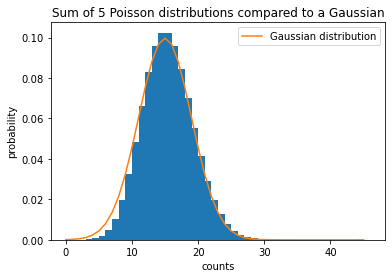

In [3]:
norm_x = np.arange(0,len(x_dists[4]))
norm_dist = norm.pdf(norm_x, loc=15, scale=4)
plt.stairs(x_dists[4], fill=True)
plt.plot(norm_dist, label='Gaussian distribution')
plt.title('Sum of 5 Poisson distributions compared to a Gaussian')
plt.ylabel('probability')
plt.xlabel('counts')
plt.legend()
plt.show()

While the distribution is getting closer to the shape of Gaussian, it is still clearly discrete, and it is not symmetric, unlike a Gaussian.

### C)
To get the average distributions, we re-scale the x-axis of the values to match that of the initial distribution.

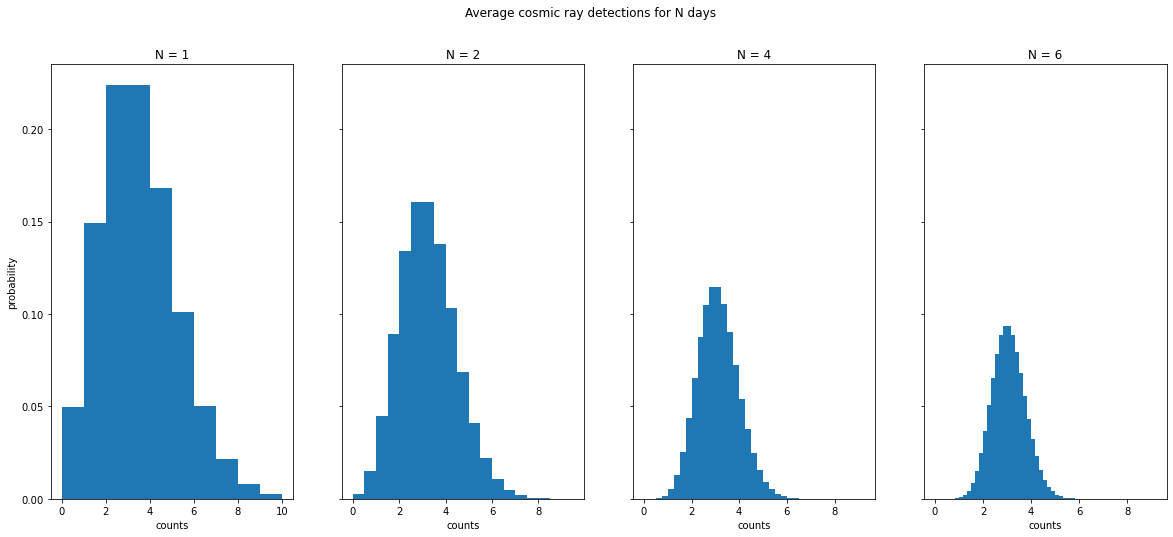

In [4]:
fig, ax = plt.subplots(1,4,figsize=(20,8), sharey=True)

ax[0].stairs(x_dists[0], fill=True)
ax[0].set_title('N = 1')

ax[1].stairs(x_dists[1], np.arange(0, len(x_dists[1])+1)/2, fill=True)
ax[1].set_title('N = 2')

ax[2].stairs(x_dists[3], np.arange(0, len(x_dists[3])+1)/4, fill=True)
ax[2].set_title('N = 4')

ax[3].stairs(x_dists[5], np.arange(0, len(x_dists[5])+1)/6, fill=True)
ax[3].set_title('N = 6')

ax[0].set_ylabel('probability')
ax[0].set_xlabel('counts')
ax[1].set_xlabel('counts')
ax[2].set_xlabel('counts')
ax[3].set_xlabel('counts')
plt.suptitle('Average cosmic ray detections for N days')
plt.show()

Like in part B, the distribution gets wider and shorter while getting more Gaussian-like, as the central limit theorem says that normalized sums of distributions tend towards a Gaussian distribution. But unlike in part B, the mean remains the same regardless of how many times they are averaged together.

### D)

For 10 days, with an average number of gamma rays of 5, we get a total of 50 gamma rays. To find the probability that these detections were from the background, we take the sum of 5 days and find the probability of getting that number of detections or more. Then we use norm.ppf() to convert this probability to a sigma value.

In [24]:
dist = x_dist
for i in range(9):
     dist = np.convolve(dist, x_dist)
p = dist[50:].sum()
sigma = norm.ppf(p)
print(f'The probability is {100*p:0.3f}%, which is a value of {abs(sigma):0.3f} sigma.')

The probability is 0.038%, which is a value of 3.370 sigma.


### Problem 2.

### A)


In [72]:
x = np.arange(0,20, 0.1)
d = rayleigh.pdf(x)
ds = [d]
for i in range(100):
    res = np.convolve(ds[i], d)
    ds.append(res)

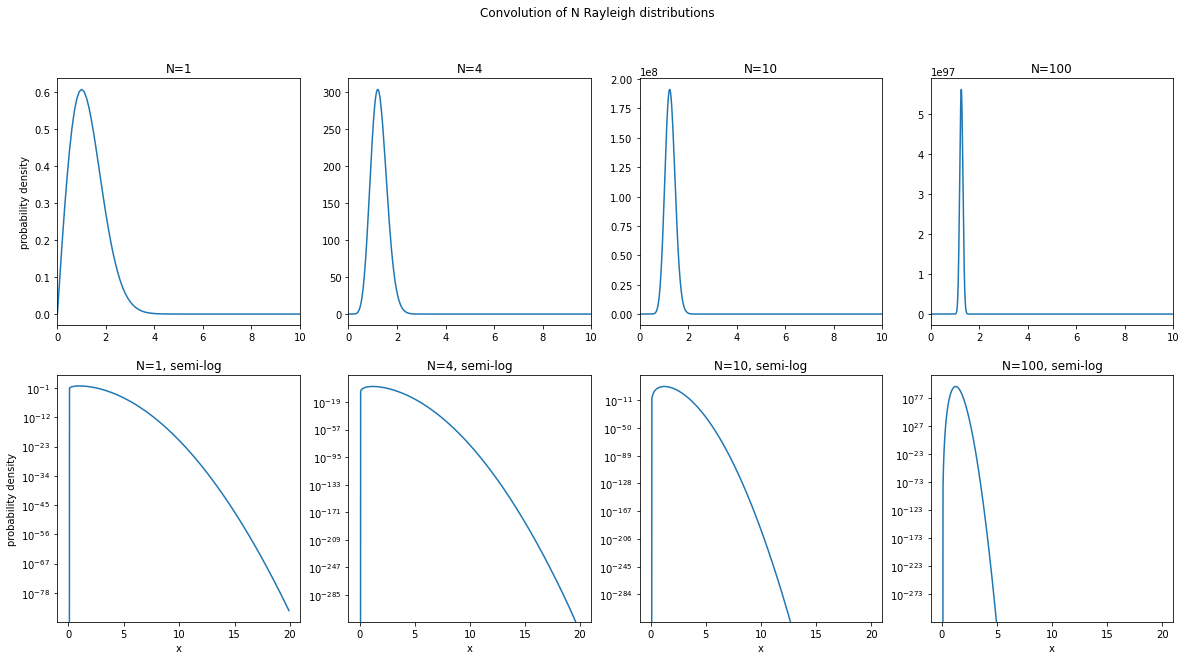

In [84]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax[0,0].plot(x, d)
ax[0,0].set_xlim(0,10)
ax[0,0].set_title('N=1')

x4 = np.linspace(0, 20, len(ds[3]))
ax[0,1].plot(x4, ds[3])
ax[0,1].set_xlim(0,10)
ax[0,1].set_title('N=4')

x10 = np.linspace(0, 20, len(ds[9]))
ax[0,2].plot(x10, ds[9])
ax[0,2].set_xlim(0,10)
ax[0,2].set_title('N=10')

x100 = np.linspace(0, 20, len(ds[99]))
ax[0,3].plot(x100, ds[99])
ax[0,3].set_xlim(0,10)
ax[0,3].set_title('N=100')

ax[1,0].plot(x, d)
ax[1,0].set_title('N=1, semi-log')
ax[1,1].plot(x4, ds[3])
ax[1,1].set_title('N=4, semi-log')
ax[1,2].plot(x10, ds[9])
ax[1,2].set_title('N=10, semi-log')
ax[1,3].plot(x100, ds[99])
ax[1,3].set_title('N=100, semi-log')

for i in range(4):
    ax[1,i].set_yscale('log')
    ax[1,i].set_xlabel('x')

ax[0,0].set_ylabel('probability density')
ax[1,0].set_ylabel('probability density')

plt.suptitle('Convolution of N Rayleigh distributions')
plt.show()

### B)